## Importing needed libraries

In [118]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

## Importing dataset

You can find the dataset [here](https://www.kaggle.com/johnsmith88/heart-disease-dataset)

In [136]:
heart_disease_data = pd.read_csv('heart.csv')# reading data
heart_disease_data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


## Discription of the data attribute
- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

## Getting to know the data

In [10]:
heart_disease_data.info()# information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
heart_disease_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
heart_disease_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [138]:
heart_disease_data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
766,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
428,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0
346,50,1,0,150,243,0,0,128,0,2.6,1,0,3,0
902,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
463,43,1,0,110,211,0,1,161,0,0.0,2,0,3,1


In [9]:
heart_disease_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Insuring that we have pure data

- lack of missing values.
- lack of duplicates.
- lack of outliers.

In [11]:
heart_disease_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
heart_disease_data.duplicated().sum()

723

In [14]:
heart_disease_data.drop_duplicates(inplace=True)

In [15]:
heart_disease_data.duplicated().sum()

0

## Exploratory Data Analysis

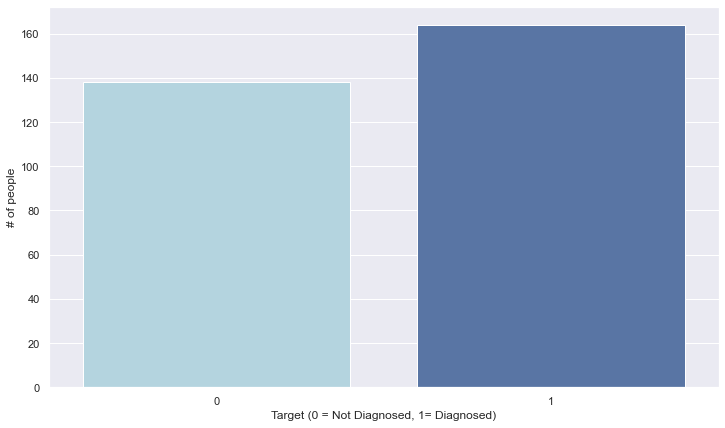

In [42]:
plt.figure(figsize=(12,7))
sns.set()
sns.countplot(x="target",
              data=heart_disease_data,palette=['lightblue', 'b'])
plt.ylabel("# of people")
plt.xlabel("Target (0 = Not Diagnosed, 1= Diagnosed)")
plt.show()

Percentage of patients without Heart Disease: 45.70%
Percentage of patients with Heart Disease: 54.30%


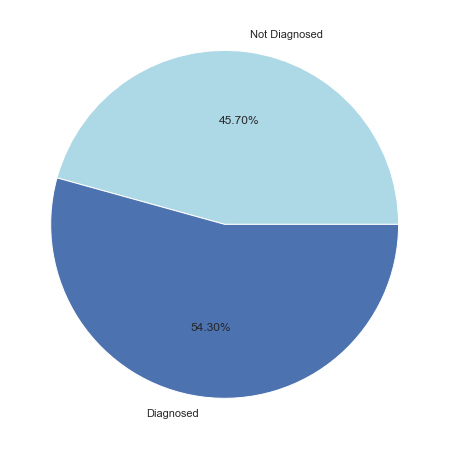

In [50]:
countNoDisease = len(heart_disease_data[heart_disease_data.target == 0])
countHaveDisease = len(heart_disease_data[heart_disease_data.target == 1])

print("Percentage of patients without Heart Disease: {:.2f}%".format((countNoDisease / (len(heart_disease_data.target))*100)))
print("Percentage of patients with Heart Disease: {:.2f}%".format((countHaveDisease / (len(heart_disease_data.target))*100)))

plt.figure(figsize=(8,8))
plt.pie([countNoDisease,countHaveDisease],
        labels=["Not Diagnosed","Diagnosed"],colors=['lightblue', 'b'],
        autopct='%1.2f%%');

Text(0, 0.5, 'Frequency')

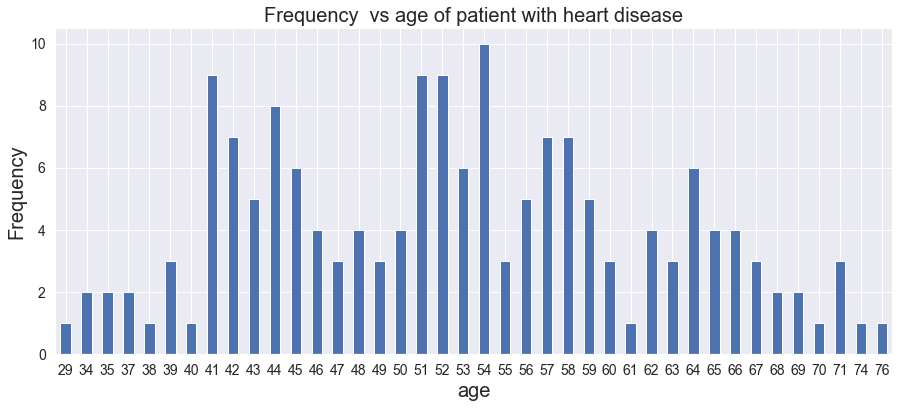

In [51]:
ax = heart_disease_data[heart_disease_data['target'] == 1]['age'].value_counts().sort_index().plot.bar(
    figsize=(15, 6),
    fontsize= 14,
    title="Frequency  vs age of patient with heart disease",
    rot=0)
ax.set_title("Frequency  vs age of patient with heart disease", fontsize=20)
ax.set_xlabel("age", fontsize=20)
ax.set_ylabel("Frequency", fontsize=20)

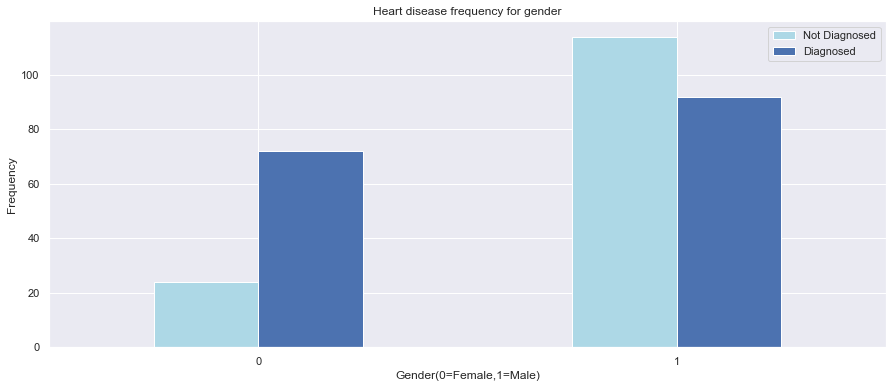

In [53]:
pd.crosstab(heart_disease_data.sex,heart_disease_data.target).plot(kind="bar",figsize=(15,6),color=['lightblue','b'])
plt.title('Heart disease frequency for gender')
plt.xlabel('Gender(0=Female,1=Male)')
plt.xticks(rotation=0)
plt.legend(["Not Diagnosed",'Diagnosed'])
plt.ylabel('Frequency')
plt.show()

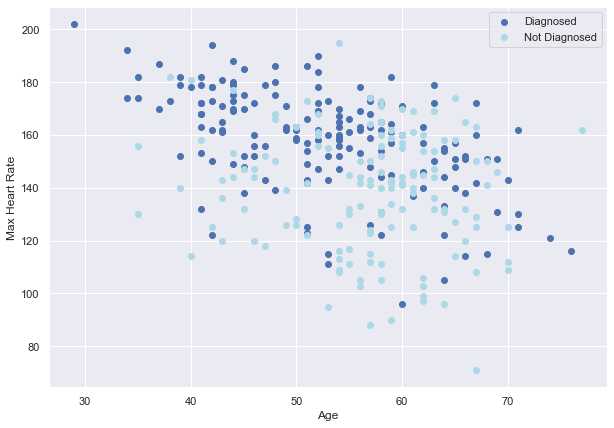

In [70]:
plt.scatter(x=heart_disease_data.age[heart_disease_data.target==1],y=heart_disease_data.thalach[(heart_disease_data.target==1)],c='b')
plt.scatter(x=heart_disease_data.age[heart_disease_data.target==0],y=heart_disease_data.thalach[(heart_disease_data.target==0)],c='lightblue')
plt.legend(['Diagnosed','Not Diagnosed'])
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
sns.set(rc = {'figure.figsize':(7,10)})
plt.show()

## Dealing with categorical columns

In [74]:
heart_disease_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [75]:
heart_disease_data.cp = pd.Categorical(heart_disease_data.cp)
heart_disease_data.restecg = pd.Categorical(heart_disease_data.restecg)
heart_disease_data.slope = pd.Categorical(heart_disease_data.slope)
heart_disease_data.ca = pd.Categorical(heart_disease_data.ca)
heart_disease_data.thal = pd.Categorical(heart_disease_data.thal)

In [76]:
heart_disease_data.dtypes

age            int64
sex            int64
cp          category
trestbps       int64
chol           int64
fbs            int64
restecg     category
thalach        int64
exang          int64
oldpeak      float64
slope       category
ca          category
thal        category
target         int64
dtype: object

In [77]:
heart_disease_data = pd.get_dummies(heart_disease_data, drop_first=True)

In [84]:
heart_disease_data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1,...,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,1,155,1,3.1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2.6,0,0,...,0,0,0,0,0,0,0,0,0,1
3,61,1,148,203,0,161,0,0.0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,1,106,0,1.9,0,0,...,0,1,0,0,0,1,0,0,1,0


**From this:**<br>

| slope | restecg|
|-------|--------|
| 1     | 1      |
| 2     | 0      |
| 3     | 0      |

**Into this**

| slope_1        | slope_2          | slope_3         | restecg_1   | restecg_2  |
|----------------|------------------|-----------------|-------------|------------|
| 1              | 0                | 0               | 1           | 0          |
| 0              | 1                | 0               | 0           | 1          |
| 0              | 0                | 1               | 0           | 1          |

## Splitting data

In [85]:
X= heart_disease_data.drop(['target'],axis=1)
y= heart_disease_data.target.values

<img src="trainvaltest.png" width="400"/>

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=1)

## Building models

### Decision tree

<img src="decision_tree.png" width="400"/>

In [113]:
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [131]:
dtc_train=dtc.score(X_train,y_train)
dtc_val=dtc.score(X_val,y_val)
print('Accuracy score for training set:' , dtc_train)
print('Accuracy score for validation set:' , dtc_val)

Accuracy score for training set: 1.0
Accuracy score for validation set: 0.9853658536585366


### Random forest

<img src="random_forest.png" width="400"/>

In [119]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=1)

In [132]:
rf_train=rf.score(X_train,y_train)
rf_val=rf.score(X_val,y_val)
print('Accuracy score for training set:' , rf_train)
print('Accuracy score for validation set:' , rf_val)

Accuracy score for training set: 1.0
Accuracy score for validation set: 0.9609756097560975


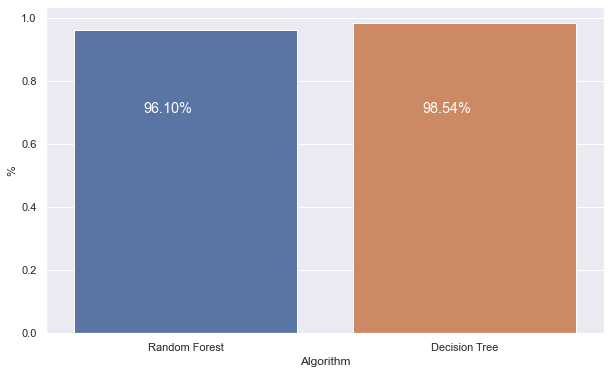

In [140]:
methods = ["Random Forest","Decision Tree"]
accuracy = [rf_val,dtc_val]

sns.set()
plt.figure(figsize=(10,6))
plt.ylabel("%")
plt.xlabel("Algorithm")
sns.barplot(x=methods, y=accuracy, palette="deep")

for line in range(len(methods)):
     plt.text(line-0.15, # x
              0.70, # y
             "{:.2f}%".format(accuracy[line]*100),
             horizontalalignment='left',
              size='large',
             color="white",
             )        
plt.show()

## Rporting on test set

In [121]:
dtc_pred = dtc.predict(X_test)

In [122]:
y_pred_dtc = pd.DataFrame({'Expected':y_test, 'Predicted':dtc_pred })
y_pred_dtc.head(10)

,Expected,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
5,1,1
6,1,1
7,1,1
8,0,0
9,1,0


In [129]:
print('Accuracy score for the actual y and predicted y:' , accuracy_score(y_test,dtc_pred))

Accuracy score for the actual y and predicted y: 0.9853658536585366
